# Import Libraries

In [85]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.cluster import KMeans

import warnings
warnings.filterwarnings("ignore")

# Load Data

In [86]:
df=pd.read_csv('data/Countries.csv')

In [87]:
df.sample(n=11)

name   Longitude   Latitude
177         Portugal   -8.501044  39.595507
168           Panama  -80.119152   8.517508
169     Pitcairn Is. -128.317042 -24.365005
196       San Marino   12.459223  43.941867
30            Belize  -88.710105  17.200275
63           Ecuador  -78.752019  -1.423816
44   Dem. Rep. Congo   23.643961  -2.877463
3           Anguilla  -63.064989  18.223959
186     Saudi Arabia   44.536863  24.122458
183           Russia   96.686561  61.980522
119           Kosovo   20.872498  42.570787

# Plot Data

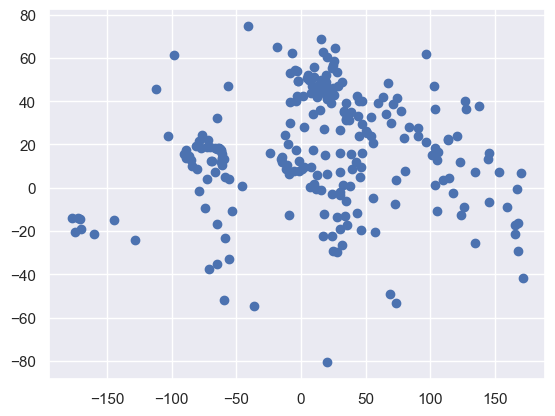

In [88]:
plt.scatter(df['Longitude'],df['Latitude'])
plt.show()

# Select Features

In [89]:
x = df.loc[:,['Longitude','Latitude']]
x.head()

Longitude   Latitude
0 -69.982677  12.520880
1  66.004734  33.835231
2  17.537368 -12.293361
3 -63.064989  18.223959
4  20.049834  41.142450

# Cluster

### Assuming 2

In [90]:
km = KMeans(n_clusters=2)

In [91]:
km.fit(x)

KMeans(n_clusters=2)

# Predict

In [92]:
clusters = km.predict(x)

In [93]:
df_cluster = df.copy()
df_cluster['Cluster'] = clusters

In [94]:
df_cluster.head()

name  Longitude   Latitude  Cluster
0        Aruba -69.982677  12.520880        1
1  Afghanistan  66.004734  33.835231        0
2       Angola  17.537368 -12.293361        0
3     Anguilla -63.064989  18.223959        1
4      Albania  20.049834  41.142450        0

# Visualize

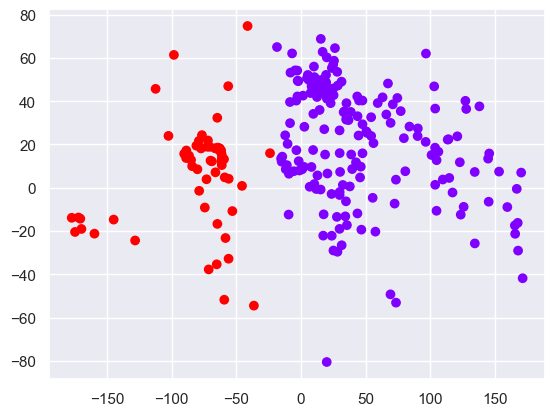

In [95]:
plt.scatter(df['Longitude'],df['Latitude'],c=df_cluster['Cluster'],cmap='rainbow')
plt.show()

# Elbow Method to get proper number of clusters

In [96]:
wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)


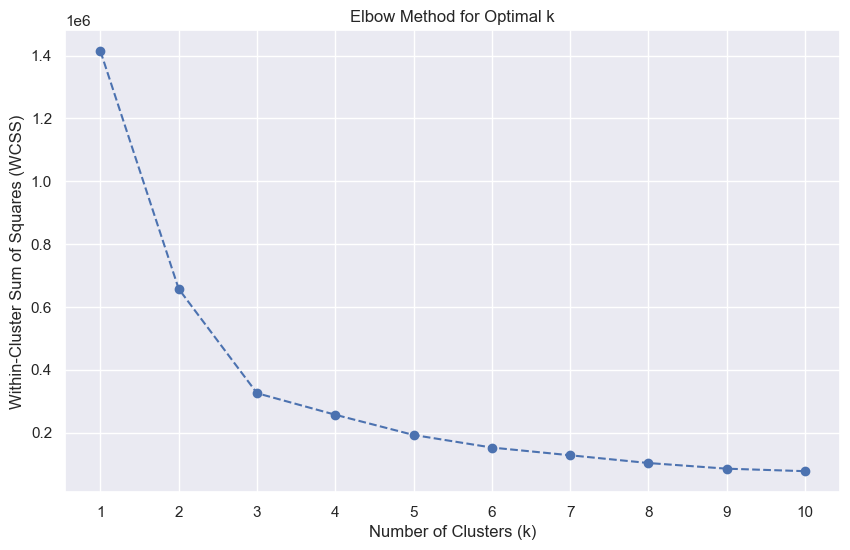

In [97]:
# Plot the elbow method
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.title('Elbow Method for Optimal k')
plt.xticks(np.arange(1, 11, 1))  # Set ticks for x-axis
plt.grid(True)
plt.show()

# Silhoutte

In [98]:
from sklearn.metrics import silhouette_score

In [99]:

silhouette_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(x)
    labels = kmeans.labels_
    silhouette_scores.append(silhouette_score(x, labels))


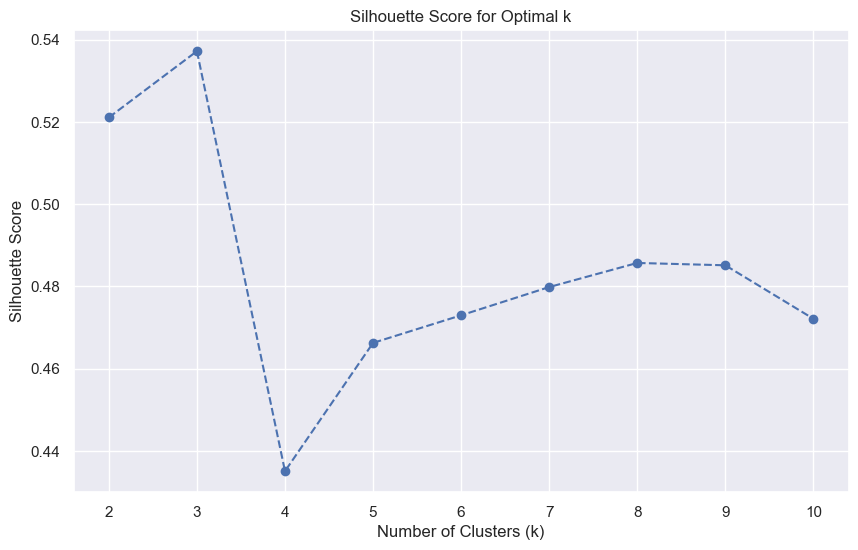

In [100]:
# Plot the silhouette scores
plt.figure(figsize=(10, 6))
plt.plot(range(2, 11), silhouette_scores, marker='o', linestyle='--')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Optimal k')
plt.xticks(np.arange(2, 11, 1))  # Set ticks for x-axis
plt.grid(True)
plt.show()

# Final cluster is 3

In [101]:
km = KMeans(n_clusters=3)
km.fit(x)
clusters = km.predict(x)


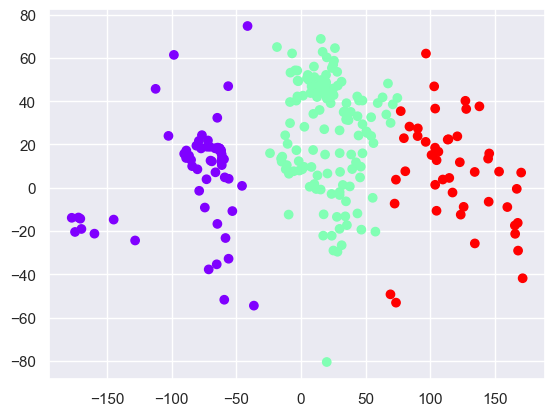

In [102]:
df_cluster = df.copy()
df_cluster['Cluster'] = clusters
plt.scatter(df['Longitude'],df['Latitude'],c=df_cluster['Cluster'],cmap='rainbow')
plt.show()